In [18]:
#importing the libraries
import pandas as pd
#loading both datasets
raw_df = pd.read_csv("data/raw_data.csv")
inc_df = pd.read_csv("data/incremental_data.csv")

## PREVIEW THE DATA

In [19]:

# Full dataset
print("Raw Data Overview")
display(raw_df.head())
raw_df.info()#help to understand the data types and non-null counts




Raw Data Overview


,order_id,customer_name,product,quantity,unit_price,order_date,region
0,1,Diana,Tablet,NaN,500.0,20/01/2024,South
1,2,Eve,Laptop,NaN,NaN,29/04/2024,North
2,3,Charlie,Laptop,2.0,250.0,08/01/2024,NaN
3,4,Eve,Laptop,2.0,750.0,07/01/2024,West
4,5,Eve,Tablet,3.0,NaN,07/03/2024,South


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       100 non-null    int64  
 1   customer_name  99 non-null     object 
 2   product        100 non-null    object 
 3   quantity       74 non-null     float64
 4   unit_price     65 non-null     float64
 5   order_date     99 non-null     object 
 6   region         75 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


### observations
The dataset contains 100 rows and 7 columns
### missing values
1. customer_name-99/100 non-null meaning there is 1 missing value
2. quantity- 74/100 meaning there are 26 missing values
3. unit_price- 65/100 meaning there are 35 missing values
4. order_date- 99/100 meaning there is 1 missing value
5. region- 75/100 meaning there are 25 missing values
### data types 
- order_date is an object hence it should be converted to datetime
- quantity and unit_price are float64 
- order_id is int64 its an identifier so its fine
- customer_name, product, and region are object

#### BELOW IS A VISUAL REPRESENTATION OF MISSING VALUES PER COLUMN


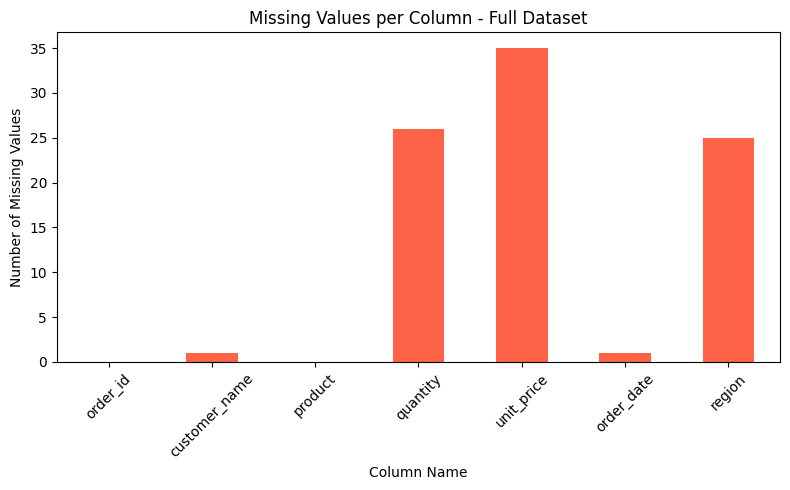

In [ ]:
import matplotlib.pyplot as plt#helps to visualize the data

#to count missing values per column in full dataset
missing_counts = raw_df.isnull().sum()

#plottinh as bar chart
plt.figure(figsize=(8,5))
missing_counts.plot(kind='bar', color='tomato')
plt.title('Missing Values per Column - Full Dataset')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


unit price has the highest number of missing values while orderdate and customername have the least

In [21]:
# Incremental dataset
print("\nIncremental Data Overview")
display(inc_df.head())
inc_df.info()


Incremental Data Overview


,order_id,customer_name,product,quantity,unit_price,order_date,region
0,101,Alice,Laptop,NaN,900,09/05/2024,Central
1,102,NaN,Laptop,1.0,300,07/05/2024,Central
2,103,NaN,Laptop,1.0,600,04/05/2024,Central
3,104,NaN,Tablet,NaN,300,26/05/2024,Central
4,105,Heidi,Tablet,2.0,600,21/05/2024,North


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10 non-null     int64  
 1   customer_name  4 non-null      object 
 2   product        10 non-null     object 
 3   quantity       6 non-null      float64
 4   unit_price     10 non-null     int64  
 5   order_date     10 non-null     object 
 6   region         8 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 692.0+ bytes


### observations
The dataset contains 10 rows and 7 columns
### missing values
1. customer_name-4/10 non-null meaning there is 6 missing values
2. quantity- 6/10 meaning there are 4 missing values
3. region- 8/10 meaning there are 2 missing values
### data types 
- order_date is an object,should be converted to datetime
- quantity is float64 
- unit_price is an integer it might need to be converted to float for consistency
- order_id is int64 its an identifier so its fine.
- customer_name, product, and region are object.

In [22]:

#Checking for duplicates
print("\nDuplicate rows (Full):", raw_df.duplicated().sum())
print("Duplicate rows (Incremental):", inc_df.duplicated().sum())



Duplicate rows (Full): 1
Duplicate rows (Incremental): 0


no duplicates on incremental but there is one in full

## saving the data


In [23]:
raw_df.to_csv("data/raw_data.csv", index=False)
inc_df.to_csv("data/incremental_data.csv", index=False)
